In [2]:
# importing the required libraries:


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
# fitting the dataset:

train_dir = r"D:\Datasets\anime_data\Train"        # path to train folder
val_dir = r"D:\Datasets\anime_data\Validation"      # path to validation folder
test_dir = r"D:\Datasets\anime_data\Test"          # path to test folder


In [4]:
# Data pre-processing & Aggumentation:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# load the data from folders:

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=16,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128,128),
    batch_size=16,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128,128),
    batch_size=16,
    class_mode='categorical'
)

# Check dataset info
print("Train samples:", train_data.samples)
print("Validation samples:", val_data.samples)
print("Test samples:", test_data.samples)
print("Classes found:", train_data.class_indices)

Found 10 images belonging to 6 classes.
Found 10 images belonging to 6 classes.
Found 10 images belonging to 6 classes.
Train samples: 10
Validation samples: 10
Test samples: 10
Classes found: {'dr.stone': 0, 'kaiaju8': 1, 'naruto': 2, 'saitama': 3, 'sasuke': 4, 'titan': 5}


In [6]:
# build the CNN model:

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Dropout(0.2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

model.summary()

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,517,574 (24.86 MB)

 Trainable params: 6,517,574 (24.86 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# compile the model:

optimizer = Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
# define early stopping callback:

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [9]:
# Trai the model:

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=80,
    callbacks=[early_stop]
)

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2000 - loss: 1.8684 - val_accuracy: 0.2000 - val_loss: 1.7715
Epoch 2/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.3000 - loss: 1.7691 - val_accuracy: 0.2000 - val_loss: 1.7511
Epoch 3/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.3000 - loss: 1.7457 - val_accuracy: 0.2000 - val_loss: 1.7349
Epoch 4/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.1000 - loss: 1.7514 - val_accuracy: 0.2000 - val_loss: 1.7213
Epoch 5/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.4000 - loss: 1.6444 - val_accuracy: 0.2000 - val_loss: 1.7075
Epoch 6/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.3000 - loss: 1.6778 - val_accuracy: 0.2000 - val_loss: 1.6947
Epoch 7/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.3000 - loss: 1.6710 - val_accuracy: 0.2000 - val_loss: 1.6831
Epoch 8/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.1000 - loss: 1.8649 - val_accuracy: 0.4000 - val_loss: 1.

In [10]:
# Evaluate the model:

test_loss, test_acc = model.evaluate(test_data)
print(f" Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 1.0000 - loss: 0.5012
 Test Accuracy: 100.00%
Test Loss: 0.5012


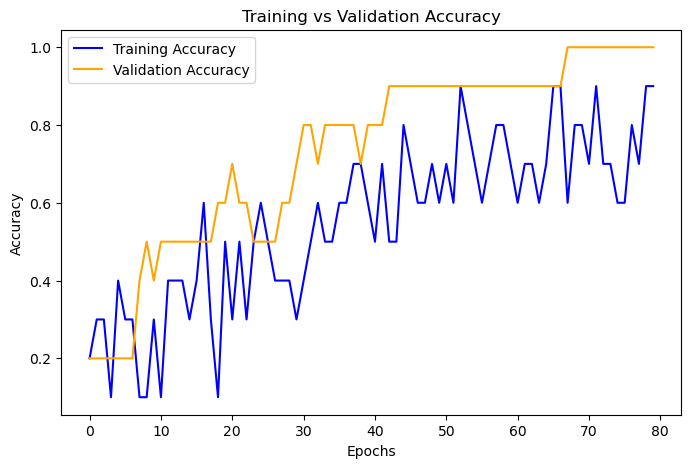

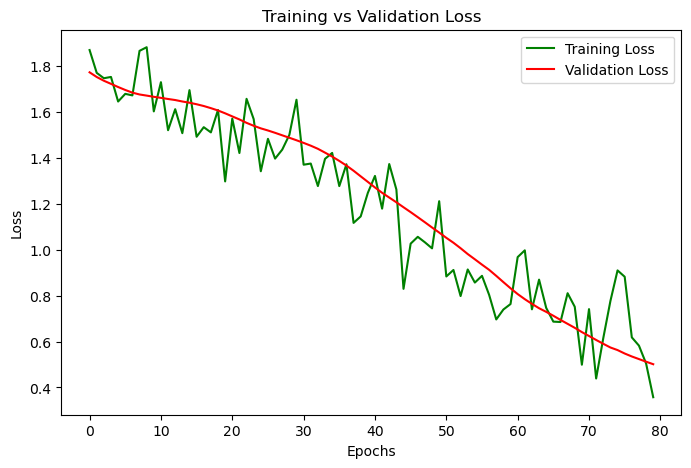

In [11]:
# Visualize the training & validation accuracy and loss:

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss', color='green')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [12]:
model.save("cnn_image_classifier.h5")
print("Model saved successfully as cnn_image_classifier.h5")

Model saved successfully as cnn_image_classifier.h5


# Test the Model that Predict the Images

In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import os

In [14]:
# load the class labels:

class_labels = ['dr.stone', 'kaiaju8', 'naruto', 'saitama', 'sasuke', 'titan']
print("Class Labels:", class_labels)

Class Labels: ['dr.stone', 'kaiaju8', 'naruto', 'saitama', 'sasuke', 'titan']


In [18]:
img_path = r"C:\Users\admin\Downloads\download.jpeg"



img = image.load_img(img_path, target_size=(128, 128))  
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  


In [19]:
pred = model.predict(img_array)

# Get class index and probability
predicted_index = np.argmax(pred)
confidence = np.max(pred) * 100
predicted_label = class_labels[predicted_index]

print(f"Predicted Class: {predicted_label}")
print(f"Confidence: {confidence:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted Class: kaiaju8
Confidence: 43.83%


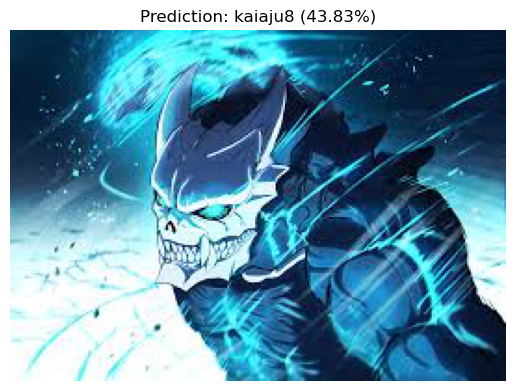

In [20]:
plt.imshow(image.load_img(img_path))
plt.title(f"Prediction: {predicted_label} ({confidence:.2f}%)")
plt.axis("off")
plt.show()